Naive Bayes

Discriminative vs Generative

Introduction to Naive Bayes

The Naive Bayes Classifier technique is based on the Bayesian theorem and is particularly suited when then high dimensional data.
It's simple & out-performs many sophisticated methods
Rather than attempting to calculate the values of each attribute value P(d1, d2, d3|h), they are assumed to be conditionally independent given the target value and calculated as P(d1|h) * P(d2|h) and so on.
The above assumption is very strong & not true for in real situations, still naive bayes works quite well

Class Probabilities
For Bi-class classification, P(Class 1) = Count(Class 1) / Count( Class 1 + Class 2)

Conditional Probabilities
Frequency of each attribute value for each class
Consider a dataset with attribute - weather ( values - sunny & rainy ). Target - Sports ( values - chess & tennis )
P(weather=sunny|target=tennis) = Count ( weather=sunny & target=tennis ) / Count ( target=tennis )

Naive Bayes' Classifier

Formula : Prediction = Max(P(feature|h).P(h))
Let's predict for a new data (weather=sunny)
Possibility of tennis = P(weather=sunny|target=tennis) . P(target=tennis)
Possibility of chess = P(weather=sunny|target=chess) . P(target=chess)
We choose the possibility with higher values
Normalize the value to bring it to scale of 0 to 1

More features
In case, we add more feature like skill (values - low,moderate,high)
Our probability becomes, P(weather=sunny|target=tennis).P(skill=moderate|target=tennis).P(target=tennis)

Gaussian Naive Bayes

The above fundamental example is for categorical data
We can use Naive Bayes for continues data as well
Assumption is data should be of Gaussian Distribution
Let's understand a bit about Gaussian PDF

Possibility of tennis = P(pdf(precipitation)|class=tennis) . P(pdf(windy)|class=tennis) . P(class=tennis
Prior probability can be configured. By default, each class is assigned equal probability #### Temperature Distribution The distribution of temperature in city can be a good example of Gaussian Distribution.
Taking the above Temperature Distribution Example, let us try to understand the two fundamental terms in Bayesian Inference.
Likelihood ($P(X|\mu,\sigma)$) : How likely is the data generated from this guassian.This is given by $ \Pi_{i=0}^{N} g(x_i)$ which is joing probability.
Posterior ($P(\mu,\sigma|X)$) : How likely is the gaussian with $\mu$ mean representative of data's distribution.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
from sklearn.naive_bayes import GaussianNB

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
gnb = GaussianNB()

In [7]:
gnb.fit(df,iris.target)

GaussianNB()

In [8]:
gnb.score(df,iris.target)

0.96

Multinomial Naive Bayes

Suited for classification of data with discrete features ( count data )
Very useful in text processing
Each text will be converted to vector of word count
Cannot deal with negative numbers

In [11]:
food_review = pd.read_csv('D:\Martina\\notebooks\\Reviews.csv')

In [12]:
food_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [13]:
columns = ['Text','Score']
food_review[columns].head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [14]:
review_data = food_review[['Text','Score']]

In [15]:
review_data = review_data[review_data.Score != 3]

In [16]:
review_data['Sentiment'] = review_data.Score.map(lambda s:0 if s < 3 else 1)

In [17]:
review_data.drop('Score',axis=1,inplace=True)

In [18]:
review_data.head()

,Text,Sentiment
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


In [19]:
review_data.Sentiment.value_counts()

1    443777
0     82037
Name: Sentiment, dtype: int64

In [20]:
review_data = review_data.sample(10000)

Remove punctuations

In [21]:
from nltk.tokenize import RegexpTokenizer

In [22]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [23]:
review_data['Text'] = review_data.Text.map(lambda x:tokenizer.tokenize(x))

In [24]:
review_data.Text

558380    [These, are, hands, down, the, best, roasted, ...
133987    [To, be, frank, I, purchased, these, as, a, fi...
155570    [You, get, your, money, s, worth, Strong, stuf...
466116    [There, is, no, one, anymore, that, is, not, l...
424232    [Xylitol, was, recommended, by, my, doctor, to...
                                ...                        
348903    [My, whole, family, loves, these, Snapea, cris...
257202    [The, most, appealing, aspect, of, Men, Care, ...
511896    [Roland, teas, from, China, or, Hong, Kong, ar...
440593    [I, highly, recommend, this, product, Deliciou...
5911      [Purchased, case, of, cans, from, Amazon, com,...
Name: Text, Length: 10000, dtype: object

Stemming

A root is a form which is not further analysable In the form ‘untouchables’ the root is ‘touch’, to which first the suffix ‘-able’, then the prefix ‘un-‘ and finally the suffix ‘-s’ have been added. In a compound word like ‘wheelchair’ there are two roots, ‘wheel’ and ‘chair’.Derivational Morphology Derivational morphology results in the creation of a new word with a new meaning

Inflictional Morphology In contrast, inflectional morphology involves an obligatory grammatical specification

A stem is of concern only when dealing with inflectional morphology.(which doesn't change the core meaning) In the form ‘untouchables’ the stem is ‘untouchable’, although in the form ‘touched’ the stem is ‘touch’; in the form ‘wheelchairs’ the stem is ‘wheelchair’, even though the stem contains two roots('wheel' and 'chair').

In [25]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [26]:
review_data['Text'] = review_data.Text.map(lambda l: [stemmer.stem(word) for word in l])

In [27]:
review_data.Text = review_data.Text.str.join(sep=' ')

Preprocessing

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
cv = CountVectorizer(stop_words='english')

In [30]:
review_data_tf = cv.fit_transform(review_data.Text)

In [31]:
print (review_data_tf.shape)

(10000, 13241)


Splitting data into train_test

In [32]:
from sklearn.model_selection import train_test_split;
trainX,testX,trainY,testY = train_test_split(review_data_tf,review_data.Sentiment)

Create Model

In [33]:
review_data.Sentiment.value_counts()

1    8438
0    1562
Name: Sentiment, dtype: int64

Class Imbalanced
Two ways to handle this - dealing with data, dealing with algo

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
mnb = MultinomialNB(class_prior=[.25,.75])

In [36]:
mnb.fit(trainX,trainY)

MultinomialNB(class_prior=[0.25, 0.75])

In [37]:
mnb.class_prior

[0.25, 0.75]

In [38]:
y_pred = mnb.predict(testX)

In [39]:
mnb.score(testX,testY)

0.8752

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_true=testY, y_pred=y_pred)
# Rows corrospond to the actual classes
# Collumns corrospond to the predicted classes

array([[ 196,  196],
       [ 116, 1992]], dtype=int64)

Bernoulli's Naive Bayes

Like MultinomialNB, this classifier is suitable for discrete data.
The difference is that while MultinomialNB works with occurrence counts
BernoulliNB is designed for binary/boolean features.
If data is not binary, internally Binarization preprocessing will happen
Can deal with negative numbers

In [42]:
from sklearn.datasets import make_classification

In [43]:
X, Y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0)

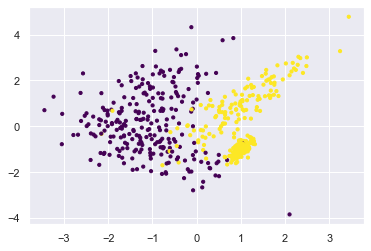

In [44]:
plt.scatter(X[:,0],X[:,1],c=Y,s=10, cmap='viridis')

In [45]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler;

In [46]:
scalar = MinMaxScaler()
X = scalar.fit_transform(X)
trainX,testX,trainY,testY = train_test_split(X,Y)

In [47]:
bnb = BernoulliNB(binarize=0.5)
mnb = MultinomialNB()

In [48]:
bnb.fit(trainX, trainY)
mnb.fit(trainX, trainY)

MultinomialNB()

In [49]:
bnb.score(testX,testY)

0.92

In [50]:
mnb.score(testX,testY)

0.808

In [51]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [52]:
Z = bnb.predict(np.c_[xx.flatten(), yy.flatten()])

In [53]:
Z = Z.reshape(xx.shape)

<ipython-input-54-1a2c7d95b267>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


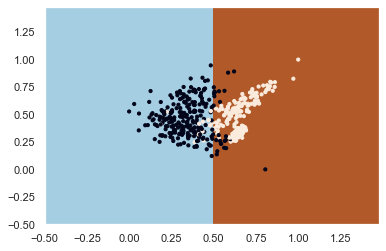

In [54]:
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)

Out-of-core training

Naive Bayes supports partial_fit function
For data which cannot be fit to RAM, we can use partial_fit function to gradually train the model

In [55]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [56]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

HashingVectorizer is suited for large data, since it doesn't maintain state

In [57]:
from sklearn.feature_extraction.text import HashingVectorizer
vectorizer = HashingVectorizer(decode_error='ignore', n_features=2 ** 12,
                               alternate_sign=False)
#from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer(stop_words="english")

In [58]:
review_data_chunks = pd.read_csv('D:\Martina\\notebooks\\Reviews.csv', chunksize=10000)

In [59]:
test = pd.read_csv('D:\Martina\\notebooks\\Reviews.csv').sample(5000)

In [60]:
test = test[['Text','Score']]
test = test[test.Score != 3]
test['Sentiment'] = test.Score.map(lambda s:0 if s < 3 else 1)
test.Text = test.Text.map(lambda x:tokenizer.tokenize(x))
test.Text = test.Text.map(lambda l: [stemmer.stem(word) for word in l])
test.Text = test.Text.str.join(sep=' ')
test_tf = vectorizer.transform(test.Text)

In [61]:
mnb = MultinomialNB(class_prior=[.22,.78])

Taking chunk of data each time & fitting the model & gradually improving it

In [62]:
for idx,review_data in enumerate(review_data_chunks):
    print ('iter : ',idx)
    review_data = review_data[['Text','Score']]
    review_data = review_data[review_data.Score != 3]
    review_data['Sentiment'] = review_data.Score.map(lambda s:0 if s < 3 else 1)
    review_data.Text = review_data.Text.map(lambda x:tokenizer.tokenize(x))
    review_data.Text = review_data.Text.map(lambda l: [stemmer.stem(word) for word in l])
    review_data.Text = review_data.Text.str.join(sep=' ')
    text_tf = vectorizer.transform(review_data.Text)
    mnb.partial_fit(text_tf,review_data.Sentiment,classes=[0,1])
    y_pred = mnb.predict(test_tf)
    print (confusion_matrix(y_pred=y_pred, y_true=test.Sentiment))

iter :  0
[[   2  772]
 [   1 3831]]
iter :  1
[[  10  764]
 [   1 3831]]
iter :  2
[[  19  755]
 [   2 3830]]
iter :  3
[[  27  747]
 [   3 3829]]
iter :  4
[[  30  744]
 [   3 3829]]
iter :  5
[[  35  739]
 [   3 3829]]
iter :  6
[[  38  736]
 [   2 3830]]
iter :  7
[[  41  733]
 [   2 3830]]
iter :  8
[[  40  734]
 [   2 3830]]
iter :  9
[[  42  732]
 [   2 3830]]
iter :  10
[[  45  729]
 [   2 3830]]
iter :  11
[[  48  726]
 [   2 3830]]
iter :  12
[[  49  725]
 [   2 3830]]
iter :  13
[[  48  726]
 [   2 3830]]
iter :  14
[[  50  724]
 [   2 3830]]
iter :  15
[[  50  724]
 [   2 3830]]
iter :  16
[[  50  724]
 [   1 3831]]
iter :  17
[[  51  723]
 [   1 3831]]
iter :  18
[[  50  724]
 [   2 3830]]
iter :  19
[[  50  724]
 [   1 3831]]
iter :  20
[[  48  726]
 [   1 3831]]
iter :  21
[[  51  723]
 [   1 3831]]
iter :  22
[[  50  724]
 [   2 3830]]
iter :  23
[[  53  721]
 [   2 3830]]
iter :  24
[[  54  720]
 [   2 3830]]
iter :  25
[[  55  719]
 [   2 3830]]
iter :  26
[[  55  719

As we can see, model keeps improving
Next step would be to use sampling techniques to improve further accuracy